In [34]:
import numpy as np
import pandas as pd

# Read all Dataset

In [35]:
days_combined = pd.read_csv('Days_Combined.csv')
days_combined.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1050767, 21)

In [36]:
days_combined.columns

Index(['Unnamed: 0', 'Time', 'Date', 'Altitude', 'Speed', 'Heading', 'Lat',
       'Lon', 'Age', 'Range', 'Bearing', 'Tail', 'Station Identifier',
       'Date and Time', 'Modifier', 'Wind', 'Visibility', 'Altimeter Setting',
       'Temperature', 'Dew Point', 'Row_ID'],
      dtype='object')

# Spatial Data

In [37]:
spatial_data=days_combined[['Lat','Lon','Range','Bearing','Heading','Altitude']]
spatial_data.head()

,Lat,Lon,Range,Bearing,Heading,Altitude
0,40.756298,-80.180405,19.611824,-96.946726,0.0,2400
1,40.756298,-80.180405,19.611824,-96.946726,0.0,2400
2,40.753006,-80.178040,19.462659,-98.087400,0.0,2400
3,40.753006,-80.178040,19.462659,-98.087400,0.0,2400
4,40.753006,-80.178040,19.462659,-98.087400,0.0,2400


In [38]:
# Make CSV
spatial_data.to_csv('spatial_data.csv')


# Count Number of Rows

In [39]:
# Taking 25%
count_25=int((25*spatial_data.shape[0])/100)

# Taking 50%
count_50=int((50*spatial_data.shape[0])/100)

# Taking 75%
count_75=int((75*spatial_data.shape[0])/100)

# Taking 100%
count_100=spatial_data.shape[0]


In [40]:
print(count_25)
print(count_50)
print(count_75)
print(count_100)

262691
525383
788075
1050767


# Read Spatial Data

In [41]:
from timeit import default_timer as timer
read_time=[]


# Read 25% data
start_25=timer()
spatial_combined_25 = pd.read_csv('spatial_data.csv',nrows=count_25)
end_25=timer()

# Read 50% data
start_50=timer()
spatial_combined_50 = pd.read_csv('spatial_data.csv',nrows=count_50)
end_50=timer()

# Read 75% data
start_75=timer()
spatial_combined_75 = pd.read_csv('spatial_data.csv',nrows=count_75)
end_75=timer()

# Read 100% data
start_100=timer()
spatial_combined_100 = pd.read_csv('spatial_data.csv',nrows=count_100)
spatial_combined_100=spatial_combined_100.fillna(0)
end_100=timer()

# Appending execution time
read_time.append(end_25-start_25)
read_time.append(end_50-start_50)
read_time.append(end_75-start_75)
read_time.append(end_100-start_100)

In [42]:
read_time

[0.22120216900009382,
 0.4364906770000516,
 0.6432091320000382,
 0.864320050999936]

# Memory size of DataFrames


In [43]:
spatial_combined_25.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262691 entries, 0 to 262690
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  262691 non-null  int64  
 1   Lat         262691 non-null  float64
 2   Lon         262691 non-null  float64
 3   Range       262691 non-null  float64
 4   Bearing     262691 non-null  float64
 5   Heading     262691 non-null  float64
 6   Altitude    262691 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 14.0 MB


In [44]:
spatial_combined_50.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525383 entries, 0 to 525382
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  525383 non-null  int64  
 1   Lat         525383 non-null  float64
 2   Lon         525383 non-null  float64
 3   Range       525383 non-null  float64
 4   Bearing     525383 non-null  float64
 5   Heading     525383 non-null  float64
 6   Altitude    525383 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 28.1 MB


In [45]:
spatial_combined_75.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788075 entries, 0 to 788074
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  788075 non-null  int64  
 1   Lat         788075 non-null  float64
 2   Lon         788075 non-null  float64
 3   Range       788075 non-null  float64
 4   Bearing     788075 non-null  float64
 5   Heading     788075 non-null  float64
 6   Altitude    788075 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 42.1 MB


In [46]:
spatial_combined_100.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050767 entries, 0 to 1050766
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1050767 non-null  int64  
 1   Lat         1050767 non-null  float64
 2   Lon         1050767 non-null  float64
 3   Range       1050767 non-null  float64
 4   Bearing     1050767 non-null  float64
 5   Heading     1050767 non-null  float64
 6   Altitude    1050767 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 56.1 MB


# SQL

In [47]:
import sqlite3
conn = sqlite3.connect('spatial_database')
c = conn.cursor()
c.execute('CREATE TABLE IF NOT EXISTS spatial_data (Table_Index_Key)')
conn.commit() 


# Time complexity for Insertion using SQL Queries

In [48]:
sql_insert_execution_time=[]

spatial_data[:count_25].to_sql('spatial_data', conn, if_exists='replace', index = False)

# Inserting 25% of data
sql_insert_start_25=timer()
for i in range(count_25):
    values = tuple(spatial_data.iloc[i])
    c.execute("insert into spatial_data values (?,?,?,?,?,?)", values)
sql_insert_end_25=timer()

# Inserting 50% of data
sql_insert_start_50=timer()
for i in range(count_50):
    values = tuple(spatial_data.iloc[i])
    c.execute("insert into spatial_data values (?,?,?,?,?,?)", values)
sql_insert_end_50=timer()


# Inserting 75% of data
sql_insert_start_75=timer()
for i in range(count_75):
    values = tuple(spatial_data.iloc[i])
    c.execute("insert into spatial_data values (?,?,?,?,?,?)", values)
sql_insert_end_75=timer()


# Inserting 100% of data
sql_insert_start_100=timer()
for i in range(count_100):
    values = tuple(spatial_data.iloc[i])
    c.execute("insert into spatial_data values (?,?,?,?,?,?)", values)
sql_insert_end_100=timer()


# Appending execution time
sql_insert_execution_time.append(sql_insert_end_25-sql_insert_start_25)
sql_insert_execution_time.append(sql_insert_end_50-sql_insert_start_50)
sql_insert_execution_time.append(sql_insert_end_75-sql_insert_start_75)
sql_insert_execution_time.append(sql_insert_end_100-sql_insert_start_100)

In [49]:
sql_insert_execution_time

[36.16345506899995, 72.43575800200006, 108.78674009200006, 144.87997193399997]

# KD Tree

In [50]:
import numpy as np
import scipy
import scipy.spatial
import sys
sys.setrecursionlimit(10**6)

tree_execution_time=[]

tree_start_25=timer()
spatial_data_arr_25=spatial_data[:count_25].to_numpy()
tree = scipy.spatial.KDTree(spatial_data_arr_25, leafsize=2)
dist, count = tree.query(spatial_data_arr_25[:100], k=3) 
tree_end_25=timer()

tree_start_50=timer()
spatial_data_arr_50=spatial_data[:count_50].to_numpy()
tree = scipy.spatial.KDTree(spatial_data_arr_50, leafsize=2)
dist, count = tree.query(spatial_data_arr_50[:100], k=3)

tree_end_50=timer()

tree_start_75=timer()
spatial_data_arr_75=spatial_data[:count_75].to_numpy()
tree = scipy.spatial.KDTree(spatial_data_arr_75, leafsize=2)
dist, count = tree.query(spatial_data_arr_75[:100], k=3)
tree_end_75=timer()


tree_start_100=timer()
spatial_data_arr_100=spatial_data[:count_100].to_numpy()
spatial_data_arr_100 = np.where(np.isnan(spatial_data_arr_100), 0, spatial_data_arr_100)
tree = scipy.spatial.KDTree(spatial_data_arr_100, leafsize=2)
dist, count = tree.query(spatial_data_arr_100[:100], k=3)
tree_end_100=timer()


# Appending execution time
tree_execution_time.append(tree_end_25-tree_start_25)
tree_execution_time.append(tree_end_50-tree_start_50)
tree_execution_time.append(tree_end_75-tree_start_75)
tree_execution_time.append(tree_end_100-tree_start_100)
    

In [51]:
tree_execution_time

[16.45643406299996, 36.0885287640001, 55.52870120400007, 75.6533799939998]

# Graph for Insertion Time

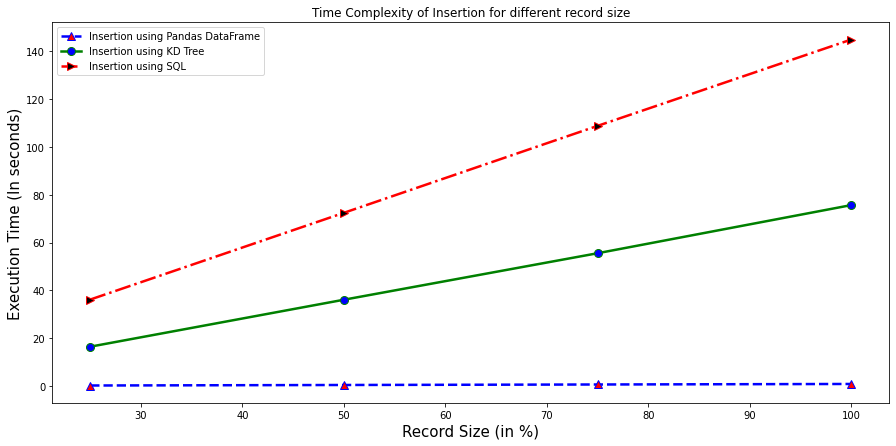

In [106]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# List for % of data
count_percent=[25,50,75,100]
figure(figsize=(15,7))
# plt.plot(count_percent,read_time, 'ro-', label = "Insertion using SQL", linewidth = '2.5',markersize=8)
# plt.plot(count_percent,sql_insert_execution_time, 'go-', label = "Insertion using Pandas DataFrame", linewidth = '2.5',markersize=8)
# plt.plot(count_percent,tree_execution_time, 'rs', label = "Insertion using SQL", linewidth = '2.5',markersize=8)


plt.plot(count_percent,read_time, label = "Insertion using Pandas DataFrame", linewidth = '2.5',
         color='blue', linestyle='--', marker='^', markerfacecolor='red', markersize=8)

plt.plot(count_percent,tree_execution_time, label = "Insertion using KD Tree", linewidth = '2.5',
         color='green', linestyle='-', marker='o', markerfacecolor='blue', markersize=8)

plt.plot(count_percent,sql_insert_execution_time, label = "Insertion using SQL", linewidth = '2.5',
         color='red', linestyle='-.', marker='>', markerfacecolor='black', markersize=8)

plt.title("Time Complexity of Insertion for different record size")
plt.xlabel("Record Size (in %)",fontsize=15)  
plt.ylabel("Execution Time (In seconds)",fontsize=15)

plt.legend()
plt.show()

# KD Tree Nearest Neighbbours (Query to get number of Nearest Neighbours)

In [79]:
knn_time=[]

knn_25_start=timer()
spatial_data_fetch_25=sorted(tree.query_ball_point(spatial_data_arr_25[:10000], 1))
knn_25_end=timer()

knn_50_start=timer()
spatial_data_fetch_50=sorted(tree.query_ball_point(spatial_data_arr_50[:50000], 1))
knn_50_end=timer()

knn_75_start=timer()
spatial_data_fetch_75=sorted(tree.query_ball_point(spatial_data_arr_75[:90000], 1))
knn_75_end=timer()

knn_100_start=timer()
spatial_data_fetch_100=sorted(tree.query_ball_point(spatial_data_arr_100[:300000], 1))
knn_100_end=timer()

length_25=0
length_50=0
length_75=0
length_100=0


# Append
knn_time.append(knn_25_end-knn_25_start)
knn_time.append(knn_50_end-knn_50_start)
knn_time.append(knn_75_end-knn_75_start)
knn_time.append(knn_100_end-knn_100_start)


for i in spatial_data_fetch_25:
  length_25=length_25+len(i)

for i in spatial_data_fetch_50:
  length_50=length_50+len(i)

for i in spatial_data_fetch_75:
  length_75=length_75+len(i)

for i in spatial_data_fetch_100:
  length_100=length_100+len(i)

# Create DataFrame

In [81]:
df = pd.DataFrame({
  'Index' : [0,1,2,3],
  'Percentage Data' : [25,50,75,100],
 'Time' : knn_time,
 'Neighbouring Points' : [length_25,length_50,length_75,length_100],
  })

df.head()

,Index,Percentage Data,Time,Neighbouring Points
0,0,25,0.552115,231785
1,1,50,4.959664,1482377
2,2,75,9.693886,2853685
3,3,100,29.242681,8148580


In [82]:
df.to_csv('Knn.csv')

# Graph for Fetch KD Tree

# Time Complexity for Fetching Data from using SQL queries

In [95]:


Fetch_sql_execution_time=[]

# Fetching 25% of the data from the df_current

fetch_sql_start_25=timer()
for i in c.execute('''SELECT * FROM spatial_data LIMIT 26269'''):
  continue
fetch_sql_end_25=timer()

# Fetching 50% of the data from the df_current

fetch_sql_start_50=timer()
for i in c.execute('''SELECT * FROM spatial_data LIMIT 52538'''):
  continue
fetch_sql_end_50=timer()


# Fetching 75% of the data from the df_current

fetch_sql_start_75=timer()
for i in c.execute('''SELECT * FROM spatial_data LIMIT 788075'''):
  continue
fetch_sql_end_75=timer()





# Fetching 100% of the data from the df_current

fetch_sql_start_100=timer()
for i in c.execute('''SELECT * FROM spatial_data LIMIT 1050767'''):
  continue
fetch_sql_end_100=timer()




Fetch_sql_execution_time.append(fetch_sql_end_25-fetch_sql_start_25)

Fetch_sql_execution_time.append(fetch_sql_end_50-fetch_sql_start_50)
Fetch_sql_execution_time.append(fetch_sql_end_75-fetch_sql_start_75)
Fetch_sql_execution_time.append(fetch_sql_end_100-fetch_sql_start_100)

In [114]:
for i in c.execute('SELECT SUM("pgsize") FROM "dbstat" where name="spatial_data"'):
  print(i)

(12861440,)


In [115]:
print(c.execute('SELECT SUM("pgsize") FROM "dbstat" where name="spatial_data"'))

In [96]:
Fetch_sql_execution_time

[0.036522473999866634,
 0.06868675599980634,
 0.36015441000017745,
 0.35435871000117913]

# Fetch Time for Pandas DataFrame

In [103]:
# 262691
# 525383
# 788075
# 1050767
df_fetch_execution_time=[]

df_fetch_start_25=timer()
df_fetch_25=pd.read_sql_query('SELECT * FROM spatial_data LIMIT 202691',conn)
df_fetch_end_25=timer()

df_fetch_start_50=timer()

df_fetch_50=pd.read_sql_query('SELECT * FROM spatial_data LIMIT 325383',conn)
df_fetch_end_50=timer()

df_fetch_start_75=timer()

df_fetch_75=pd.read_sql_query('SELECT * FROM spatial_data LIMIT 588075',conn)
df_fetch_end_75=timer()

df_fetch_start_100=timer()

df_fetch_100=pd.read_sql_query('SELECT * FROM spatial_data LIMIT 1050767',conn)
df_fetch_end_100=timer()

df_fetch_execution_time.append(df_fetch_end_25-df_fetch_start_25)
df_fetch_execution_time.append(df_fetch_end_50-df_fetch_start_50)
df_fetch_execution_time.append(df_fetch_end_75-df_fetch_start_75)
df_fetch_execution_time.append(df_fetch_end_100-df_fetch_start_100)

In [104]:
df_fetch_execution_time

[0.5320387740011938,
 0.6568284240001958,
 0.6341315419995226,
 0.6503228710007534]

# Fetch Time for Tree

In [85]:
# 262691
# 525383
# 788075
# 1050767
tree_fetch_execution_time=[]

tree_fetch_start_25=timer()
tree.data[:count_25]
tree_fetch_end_25=timer()

tree_fetch_start_50=timer()

tree.data[:count_50]
tree_fetch_end_50=timer()

tree_fetch_start_75=timer()

tree.data[:count_75]
tree_fetch_end_75=timer()

tree_fetch_start_100=timer()
tree.data[:count_100]
tree_fetch_end_100=timer()

tree_fetch_execution_time.append(tree_fetch_end_25-tree_fetch_start_25)
tree_fetch_execution_time.append(tree_fetch_end_50-tree_fetch_start_50)
tree_fetch_execution_time.append(tree_fetch_end_75-tree_fetch_start_75)
tree_fetch_execution_time.append(tree_fetch_end_100-tree_fetch_start_100)

tree_fetch_execution_time

[6.033499994373415e-05,
 3.44239997502882e-05,
 3.076600023632636e-05,
 3.238699991925387e-05]

# Sequential Fetch Time Graph

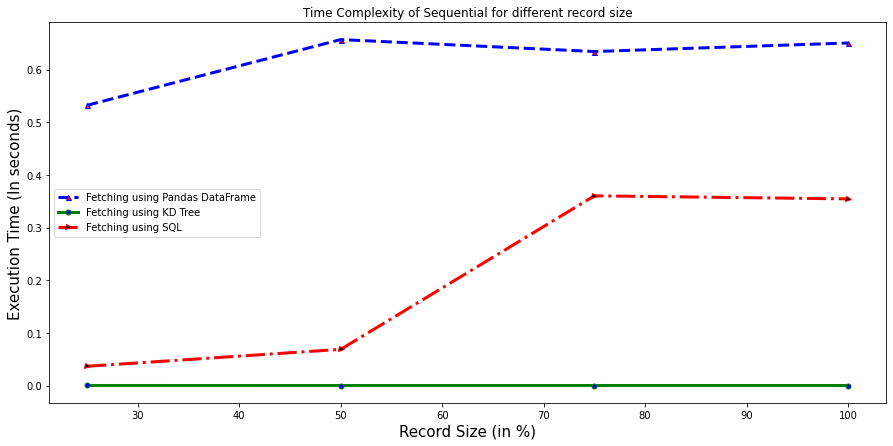

In [107]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# List for % of data
count_percent=[25,50,75,100]
figure(figsize=(15,7))
# plt.plot(count_percent,read_time, 'ro-', label = "Insertion using SQL", linewidth = '2.5',markersize=8)
# plt.plot(count_percent,sql_insert_execution_time, 'go-', label = "Insertion using Pandas DataFrame", linewidth = '2.5',markersize=8)
# plt.plot(count_percent,tree_execution_time, 'rs', label = "Insertion using SQL", linewidth = '2.5',markersize=8)


plt.plot(count_percent,df_fetch_execution_time, label = "Fetching using Pandas DataFrame", linewidth = '3',
         color='blue', linestyle='--', marker='^', markerfacecolor='red', markersize=5)

plt.plot(count_percent,tree_fetch_execution_time, label = "Fetching using KD Tree", linewidth = '3',
         color='green', linestyle='-', marker='o', markerfacecolor='blue', markersize=5)

plt.plot(count_percent,Fetch_sql_execution_time, label = "Fetching using SQL", linewidth = '3',
         color='red', linestyle='-.', marker='>', markerfacecolor='black', markersize=5)

plt.title("Time Complexity of Sequential for different record size")
plt.xlabel("Record Size (in %)",fontsize=15)  
plt.ylabel("Execution Time (In seconds)",fontsize=15)

plt.legend()
plt.show()

# Space using Pickle

In [72]:
import pickle
import scipy.spatial

tree=scipy.spatial.cKDTree(spatial_data_arr_100)
pickle.dump(tree,open('tree.p','wb'))

In [119]:
import bz2
import pickle
import _pickle as cPickle

# Pickle a file and then compress it into a file with extension 
def compressed_pickle(title, data):
 with bz2.BZ2File(title + '.pbz2', 'w') as f: 
  cPickle.dump(data, f)


compressed_pickle('tree_pickle_compressed', tree) 

In [122]:
# Saves the "data" with the "title" and adds the .pickle
def full_pickle(title, data):
 pikd = open(title + '.pickle', 'wb')
 pickle.dump(data, pikd)
 pikd.close()

full_pickle('tree_pickle_full', tree) 
